### Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.    


More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied


### Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings to floats/integers as needed

Any additional clean-up as you find fit.

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load data and drop 'index' column
sbaa = pd.read_csv('SBA_loans_project_1.csv')
sba = sbaa.copy()
sba=sba.drop(columns=['index'])
sba.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.0,0,0,1,0,0,N,100000.0,0.0,100000.0,80000.0,0
1,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.0,1,3,0,1,N,N,146200.0,0.0,146200.0,124270.0,0
2,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.0,3,3,0,1,N,N,20000.0,0.0,20000.0,17000.0,1
3,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.0,0,5,1,1,N,N,73100.0,0.0,75000.0,37500.0,1
4,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.0,0,0,1,0,N,Y,80000.0,0.0,80000.0,64000.0,0


In [6]:
#Checking NA's values
sba.isna().sum()

City                   28
State                  11
Zip                     0
Bank                 1374
BankState            1381
NAICS                   0
NoEmp                   0
NewExist              121
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4041
LowDoc               2296
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [7]:
sba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800255 entries, 0 to 800254
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               800227 non-null  object 
 1   State              800244 non-null  object 
 2   Zip                800255 non-null  int64  
 3   Bank               798881 non-null  object 
 4   BankState          798874 non-null  object 
 5   NAICS              800255 non-null  int64  
 6   NoEmp              800255 non-null  int64  
 7   NewExist           800134 non-null  float64
 8   CreateJob          800255 non-null  int64  
 9   RetainedJob        800255 non-null  int64  
 10  FranchiseCode      800255 non-null  int64  
 11  UrbanRural         800255 non-null  int64  
 12  RevLineCr          796214 non-null  object 
 13  LowDoc             797959 non-null  object 
 14  DisbursementGross  800255 non-null  float64
 15  BalanceGross       800255 non-null  float64
 16  Gr

In [8]:
pd.set_option('display.max_columns', None)
sba.describe()

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
count,800255.000000,800255.000000,800255.000000,800134.000000,800255.000000,800255.000000,800255.000000,800255.000000,8.002550e+05,800255.000000,8.002550e+05,8.002550e+05,800255.000000
mean,53789.689389,398523.640241,11.429704,1.280583,8.452672,10.808695,2759.730583,0.757813,2.009724e+05,3.260593,1.925229e+05,1.493414e+05,0.175169
std,31191.480137,263292.687557,75.201079,0.451842,237.167956,237.465427,12773.618653,0.646547,2.874264e+05,1527.422092,2.829154e+05,2.279605e+05,0.380112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27558.000000,235210.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.200000e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55409.000000,445310.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.120000e+04,0.000000
75%,83704.000000,561730.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.372760e+05,0.000000,2.250000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,9999.000000,2.000000,8800.000000,9500.000000,92006.000000,2.000000,1.144632e+07,996262.000000,5.472000e+06,5.472000e+06,1.000000


In [9]:
#Replace Na's with zero for numerical variables and with "Missing" for categorical
values_to_fill = {}
for col in sba.drop(columns=['MIS_Status']).columns:
    if sba[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

sba.fillna(value=values_to_fill,inplace=True)

In [10]:
sba.isna().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [11]:
values_to_fill

{'City': 'Missing',
 'State': 'Missing',
 'Zip': 0,
 'Bank': 'Missing',
 'BankState': 'Missing',
 'NAICS': 0,
 'NoEmp': 0,
 'NewExist': 0,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 0,
 'UrbanRural': 0,
 'RevLineCr': 'Missing',
 'LowDoc': 'Missing',
 'DisbursementGross': 0,
 'BalanceGross': 0,
 'GrAppv': 0,
 'SBA_Appv': 0}

## Feature City

In [12]:
sba['City'].value_counts()

City
LOS ANGELES      10265
HOUSTON           9166
NEW YORK          7014
CHICAGO           5313
MIAMI             4978
                 ...  
MCKEES ROCK          1
BON WIER             1
PICTON               1
REMINDERVILLE        1
RICHOMD HILL         1
Name: count, Length: 31091, dtype: int64

## Feature State

In [13]:
sba['State'].value_counts()

State
CA         116234
TX          62648
NY          51520
FL          36595
PA          31298
OH          29071
IL          26338
MA          22571
MN          21731
NJ          21383
WA          20681
GA          19836
WI          18627
MO          18404
CO          18323
MI          18244
UT          16711
AZ          15706
NC          12702
IN          12586
VA          11814
MD          11804
CT          10879
NH          10803
IA          10668
KS          10225
OR           9834
OK           8826
LA           8531
ID           8439
TN           8386
RI           8041
MT           7789
AL           7442
NV           7144
MS           6871
KY           6825
AR           5704
NE           5690
NM           5370
ME           5284
SC           5004
VT           4835
ND           4660
SD           3956
HI           3223
WV           2924
WY           2507
AK           2142
DE           1980
DC           1435
Missing        11
Name: count, dtype: int64

## Feature Bank

In [14]:
sba['Bank'].value_counts()

Bank
BANK OF AMERICA NATL ASSOC        77280
WELLS FARGO BANK NATL ASSOC       56615
JPMORGAN CHASE BANK NATL ASSOC    42886
U.S. BANK NATIONAL ASSOCIATION    31268
CITIZENS BANK NATL ASSOC          31229
                                  ...  
THE BUCKHEAD COMMUNITY BANK           1
R BANK                                1
MILLENNIUM BANKSHARES CORP            1
FIRST BUSINESS CAPITAL CORP           1
PEKIN COMMUNITY BANK                  1
Name: count, Length: 5691, dtype: int64

## Feature BankState

In [15]:
sba['BankState'].value_counts()

BankState
CA         105036
NC          70727
IL          58662
OH          52043
SD          45480
TX          42462
RI          40453
NY          35313
VA          25821
DE          21885
MN          17806
UT          16896
PA          15145
WI          13630
MO          13241
MA          12414
FL          12316
GA          12309
AL          10850
OR          10119
WA           9494
CO           9425
CT           8845
IA           8779
NJ           8393
KS           7954
MT           7014
IN           6746
SC           6598
MI           6571
OK           6524
MD           6240
NH           6057
AR           5667
MS           5323
TN           4996
NE           4747
ND           4530
LA           4472
VT           4244
NM           3957
NV           3866
KY           3860
ID           3825
DC           3550
AZ           3504
ME           3280
HI           2671
WY           1920
WV           1783
Missing      1381
AK           1286
PR            140
GU              3
EN              1


## Feature RevLineCr

In [16]:
sba['RevLineCr'].value_counts()

RevLineCr
N          374209
0          229202
Y          179202
T           13541
Missing      4041
1              21
R              14
`               9
2               6
C               2
4               1
Q               1
5               1
-               1
.               1
3               1
,               1
7               1
Name: count, dtype: int64

Since the vast majority of RevLineCr in 'N', we assign the missing values in RevLineCr to 'N'. Many incorrect values also need to be cleaned.

In [17]:
#Replace incorrect values with NA
valid_values = ['N', 'Y', 'Missing']
sba['RevLineCr'] = sba['RevLineCr'].apply(lambda x: x if x in valid_values else pd.NA)

#Replace NA's with common value 'N'
most_common_value = sba['RevLineCr'].mode()[0]
sba['RevLineCr'].fillna(most_common_value, inplace=True)
sba['RevLineCr'].value_counts()

RevLineCr
N          617012
Y          179202
Missing      4041
Name: count, dtype: int64

## Feature LowDoc

In [18]:
sba['LowDoc'].value_counts()

LowDoc
N          696572
Y           98366
Missing      2296
0            1310
C             666
S             530
A             444
R              70
1               1
Name: count, dtype: int64

In [19]:
#Replace incorrect values with NA
valid_values1 = ['N', 'Y', 'Missing']
sba['LowDoc'] = sba['LowDoc'].apply(lambda x: x if x in valid_values1 else pd.NA)

#Replace NA's with common value 'N'
most_common_values = sba['LowDoc'].mode()[0]
sba['LowDoc'].fillna(most_common_values, inplace=True)
sba['LowDoc'].value_counts()

LowDoc
N          699593
Y           98366
Missing      2296
Name: count, dtype: int64

## Feature NewExist

In [20]:
sba.NewExist.value_counts()

NewExist
1.0    573786
2.0    225426
0.0      1043
Name: count, dtype: int64

In [21]:
#Choosing only values 1 and 2
sba = sba[(sba.NewExist == 1.0) | (sba.NewExist == 2.0)]
sba.NewExist.value_counts()

NewExist
1.0    573786
2.0    225426
Name: count, dtype: int64

## Split data to train/test/validation

In [22]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder, WOEEncoder

#Split dataset into train/test/validation 
train, temp = train_test_split(sba, test_size=0.3, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Separate features and target variable
X_train = train.drop(columns=["MIS_Status"])
y_train = train["MIS_Status"]
X_valid = valid.drop(columns=["MIS_Status"])
y_valid = valid["MIS_Status"]
X_test = test.drop(columns=["MIS_Status"])
y_test = test["MIS_Status"]

In [23]:
len_data = len(X_train)
for col in X_train.columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  26988  values
Column  State  has  52  values
Column  Bank  has  5328  values
Column  BankState  has  55  values
Column  RevLineCr  has  3  values
Column  LowDoc  has  3  values


### Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value. If you drop one of the columns, make it clear what valid value is reference value.
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

#### Perform WOE Encoding

In [24]:
import category_encoders as ce
from copy import deepcopy

orig_cat_cols =["City", "State", "Bank", "BankState"]
cat_encoders = {}

# WOE encoding
woe_encoder = ce.WOEEncoder(cols=orig_cat_cols)
woe_encoder.fit(X_train[orig_cat_cols],y_train)
X_train_woe_enc = woe_encoder.transform(X_train[orig_cat_cols])
X_test_woe_enc = woe_encoder.transform(X_test[orig_cat_cols])
X_valid_woe_enc = woe_encoder.transform(X_valid[orig_cat_cols])

woe_columns = []
for col in orig_cat_cols:
    X_train[col+"_woe"] = X_train_woe_enc[col]
    X_test[col+"_woe"] = X_test_woe_enc[col]
    X_valid[col+"_woe"] = X_valid_woe_enc[col]
    woe_columns.append(col+"_woe")

cat_encoders[("orig_cat_cols","woe")] = [deepcopy(woe_encoder),"woe"]

In [25]:
cat_encoders

{('orig_cat_cols',
  'woe'): [WOEEncoder(cols=['City', 'State', 'Bank', 'BankState']), 'woe']}

In [26]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,City_woe,State_woe,Bank_woe,BankState_woe
662952,MENLO PARK,CA,94025,"SUPERIOR FINANCIAL GROUP, LLC",CA,713940,2,1.0,4,2,1,1,N,N,12500.0,0.0,12500.0,10625.0,0.429575,0.068885,2.507531,0.286841
11710,SAN JOSE,CA,95112,CAPITAL ONE NATL ASSOC,VA,323119,12,1.0,2,12,1,1,N,N,50000.0,0.0,50000.0,25000.0,-0.192571,0.068885,1.192653,1.062409
795682,REESE,MI,48757,"FIRSTMERIT BANK, N.A.",OH,0,4,2.0,0,0,1,0,N,N,170000.0,0.0,170000.0,127500.0,1.547605,0.298924,-0.652835,-0.139948
562935,SANTEE,CA,92071,"CITIBANK, N.A.",CA,713290,1,1.0,0,1,1,1,N,N,8650.0,0.0,15000.0,7500.0,-0.683752,0.068885,0.105695,0.286841
426724,WILLIAMSVILLE,NY,14221,KEYBANK NATIONAL ASSOCIATION,OH,0,9,2.0,0,0,1,0,N,N,15000.0,0.0,15000.0,7500.0,-0.317766,0.168708,-0.429296,-0.139948


#### One-Hot-Encoding

In [27]:
# One-hot-encoding
from sklearn.preprocessing import OneHotEncoder
 
ohe_orig_columns = ["RevLineCr", "LowDoc"]
all_ohe_columns = []
 
# Categorical encoders dictionary
cat_encoders = {}
 
for col in ohe_orig_columns:
    print("One-hot encoding of ", col)
    enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    enc.fit(X_train[[col]])
    result = enc.transform(X_train[[col]])
    ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
    result_train = pd.DataFrame(result, columns=ohe_columns)
    X_train = pd.concat([X_train, result_train], axis=1)
    '''Encode Validation'''
    result = enc.transform(X_valid[[col]])
    result_valid= pd.DataFrame(result, columns=ohe_columns)
    X_valid = pd.concat([X_valid, result_valid], axis=1)
    '''Encode Testing'''
    result = enc.transform(X_test[[col]])
    result_test = pd.DataFrame(result, columns=ohe_columns)
    X_test = pd.concat([X_test, result_test], axis=1)
    all_ohe_columns = all_ohe_columns + ohe_columns
    # all_ohe_columns.extend(ohe_columns)

One-hot encoding of  RevLineCr
One-hot encoding of  LowDoc


#### Standardize Variables

In [28]:
#Columns to scale
cols_numerical_sc = []
cols_numerical_orig = []
for col in X_train.drop(columns=woe_columns + all_ohe_columns):
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        print('Column to process:', col)
        cols_numerical_orig.append(col)

Column to process: Zip
Column to process: NAICS
Column to process: NoEmp
Column to process: NewExist
Column to process: CreateJob
Column to process: RetainedJob
Column to process: FranchiseCode
Column to process: UrbanRural
Column to process: DisbursementGross
Column to process: BalanceGross
Column to process: GrAppv
Column to process: SBA_Appv


#### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}
'''Scale only original numerical columns'''
for col in X_train[cols_numerical_orig]:
  if pd.api.types.is_numeric_dtype(X_train[col].dtype):
    print("StandardScaler scale of ", col)
    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    scaler.fit(X_valid[[col]])
    scaler.fit(X_test[[col]])
    X_train[col+"_sc"] = scaler.transform(X_train[[col]])
    X_valid[col+"_sc"] = scaler.transform(X_valid[[col]])
    X_test[col+"_sc"] = scaler.transform(X_test[[col]])  
    
    num_scalers[col] = [deepcopy(scaler),"StandardScaler"]
    cols_numerical_sc.append(col+"_sc")

StandardScaler scale of  Zip
StandardScaler scale of  NAICS
StandardScaler scale of  NoEmp
StandardScaler scale of  NewExist
StandardScaler scale of  CreateJob
StandardScaler scale of  RetainedJob
StandardScaler scale of  FranchiseCode
StandardScaler scale of  UrbanRural
StandardScaler scale of  DisbursementGross
StandardScaler scale of  BalanceGross
StandardScaler scale of  GrAppv
StandardScaler scale of  SBA_Appv


In [30]:
print("Scaled numerical columns:",cols_numerical_sc)

Scaled numerical columns: ['Zip_sc', 'NAICS_sc', 'NoEmp_sc', 'NewExist_sc', 'CreateJob_sc', 'RetainedJob_sc', 'FranchiseCode_sc', 'UrbanRural_sc', 'DisbursementGross_sc', 'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc']


## Model Tuning

You should tune two types of models: one Sklearn and one H2O-3. Perform tuning for the selected model type from the set of Linear models available in Sklearn and H2O-3:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

X_train.drop(['City','State','Bank','BankState','RevLineCr','LowDoc'], axis=1, inplace=True)
X_test.drop(['City','State','Bank','BankState','RevLineCr','LowDoc'], axis=1, inplace=True)
X_valid.drop(['City','State','Bank','BankState','RevLineCr','LowDoc'], axis=1, inplace=True)

#### Fitting models using l1 and l2 types of regularization

In [32]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.02, 0.05, 0.1, 1.0] 
train_score_l1 = []
train_score_l2 = []
train_score_l3 = []
test_score_l1 = []
test_score_l2 = []
test_score_l3 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l3 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear', max_iter = 500)                     
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    log_l3.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    train_score_l3.append(log_l3.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    test_score_l3.append(log_l3.score(X_test, y_test))

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

log_l1.fit(X_train, y_train)
y_pred_l1 = log_l1.predict(X_test)
print("logreg Test score: {:.2f}".format(log_l1.score(X_test, y_test)))
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy:", accuracy_l1)
confusion_l1 = confusion_matrix(y_test, y_pred_l1)
print("Logreg Confusion matrix:\n{}".format(confusion_l1))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, y_pred_l1, average="macro")))

logreg Test score: 0.83
Accuracy: 0.8306167731602743
Logreg Confusion matrix:
[[96343  2443]
 [17863  3233]]
f1 score logistic regression: 0.57


In [34]:
log_l2.fit(X_train, y_train)
y_pred_l2 = log_l2.predict(X_test)
print("logreg Test score: {:.2f}".format(log_l2.score(X_test, y_test)))
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy:", accuracy_l2)
confusion_l2 = confusion_matrix(y_test, y_pred_l2)
print("Logreg Confusion matrix:\n{}".format(confusion_l2))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, y_pred_l2, average="macro")))

logreg Test score: 0.82
Accuracy: 0.8237516891610083
Logreg Confusion matrix:
[[98737    49]
 [21080    16]]
f1 score logistic regression: 0.45


In [35]:
log_l3.fit(X_train, y_train)
y_pred_l3 = log_l3.predict(X_test)
print("logreg Test score: {:.2f}".format(log_l3.score(X_test, y_test)))
accuracy_l3 = accuracy_score(y_test, y_pred_l3)
print("Accuracy:", accuracy_l3)
confusion_l3 = confusion_matrix(y_test, y_pred_l3)
print("Logreg Confusion matrix:\n{}".format(confusion_l3))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, y_pred_l3, average="macro")))

logreg Test score: 0.82
Accuracy: 0.8237600306968519
Logreg Confusion matrix:
[[98751    35]
 [21093     3]]
f1 score logistic regression: 0.45


#### Calculate F1 and Threshold

In [36]:
from sklearn.metrics import precision_recall_curve
# Get arrays of precision and recall for various probability thresholds
precision, recall, thresholds = precision_recall_curve(y_true=y_test, 
                                                       probas_pred=log_l1.predict_proba(X_test)[:,1])
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
print("Threshold for best F1:", thresholds[best_f1_id])

Best f1: 0.44010482105036436
Index of threshold: 85244
Threshold for best F1: 0.21858060175890415


In [37]:
from sklearn.metrics import precision_recall_curve
# Get arrays of precision and recall for various probability thresholds
precision, recall, thresholds = precision_recall_curve(y_true=y_test, 
                                                       probas_pred=log_l2.predict_proba(X_test)[:,1])
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
print("Threshold for best F1:", thresholds[best_f1_id])

Best f1: 0.3315704852719606
Index of threshold: 42077
Threshold for best F1: 0.173906469574251


In [38]:
from sklearn.metrics import precision_recall_curve
# Get arrays of precision and recall for various probability thresholds
precision, recall, thresholds = precision_recall_curve(y_true=y_test, 
                                                       probas_pred=log_l3.predict_proba(X_test)[:,1])
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
print("Threshold for best F1:", thresholds[best_f1_id])

Best f1: 0.331440256729533
Index of threshold: 42189
Threshold for best F1: 0.1742778196946892


#### Calculate AUCPR

In [39]:
from sklearn.metrics import average_precision_score
print("AUCPR:",average_precision_score(y_true=y_test, y_score=log_l1.predict_proba(X_test)[:,1]))
print("AUCPR:",average_precision_score(y_true=y_test, y_score=log_l2.predict_proba(X_test)[:,1]))
print("AUCPR:",average_precision_score(y_true=y_test, y_score=log_l3.predict_proba(X_test)[:,1]))

AUCPR: 0.4046705488505472
AUCPR: 0.19795609358368843
AUCPR: 0.19718025857955385


#### After comparing different regularizations, I see that model with penalty = 'l1' and solver = 'liblinear' has the highest AUCPR: 0.405, F1 score: 0.44, and threshold: 0.219

#### Performing Grid Search to find better parameters

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Using Gridsearch to find the best value for C
param_grid = {'C':[0.001, 0.01, 0.02, 0.05, 0.1, 1.0]}
grid2 = GridSearchCV(estimator=log_l1, param_grid= param_grid, cv=5)
                     
grid2.fit(X_train, y_train)
print(grid2.best_params_)

{'C': 0.001}


In [41]:
'''Re-train model with best params'''
Y_tr = y_train.copy()
X_tr = X_train.copy()
Y_tst = y_test.copy()
X_tst = X_test.copy()

best_model = LogisticRegression(penalty='l1',
                                C=0.001,
                                solver='liblinear',
                                max_iter=500,
                                random_state=1234)

best_model.fit(X_tr, Y_tr)
y_tst_pred = best_model.predict(X_tst)
y_tr_pred = best_model.predict(X_tr)
print("F1 for Train :", f1_score(Y_tr, y_tr_pred, average='macro'))
f1 = f1_score(Y_tst, y_tst_pred, average='macro')
print("F1 for Test:", f1)
print("Test set confusion matrix:")
print(confusion_matrix(Y_tst, y_tst_pred))
print("AUCPR:",average_precision_score(y_true=y_test, y_score=best_model.predict_proba(X_test)[:,1]))

F1 for Train : 0.5843525146439434
F1 for Test: 0.566213595568534
Test set confusion matrix:
[[96574  2212]
 [18103  2993]]
AUCPR: 0.40506819263419824


#### The model with penalty = 'l1', solver = 'liblinear', and C = 0.001 is the best sklearn model.

## Feature Engineering

#### Using Binning and Interaction method

In [42]:
X_train_fe = X_train.copy()
X_valid_fe = X_valid.copy()
X_test_fe = X_test.copy()

In [43]:
#Binning columns
X_train_fe['FranchiseCode_bin']=pd.cut(X_train_fe['FranchiseCode'], bins = 5, labels = False)
X_train_fe['NAICS_bin']=pd.cut(X_train_fe['NAICS'], bins = 5, labels = False)
X_train_fe['NoEmp_bin']=pd.cut(X_train_fe['NoEmp'], bins = 5, labels = False)
X_train_fe['CreateJob_bin']=pd.cut(X_train_fe['CreateJob'], bins = 5, labels = False)
X_train_fe['RetainedJob_bin']=pd.cut(X_train_fe['RetainedJob'], bins = 5, labels = False)

X_valid_fe['FranchiseCode_bin']=pd.cut(X_valid_fe['FranchiseCode'], bins = 5, labels = False)
X_valid_fe['NAICS_bin']=pd.cut(X_valid_fe['NAICS'], bins = 5, labels = False)
X_valid_fe['NoEmp_bin']=pd.cut(X_valid_fe['NoEmp'], bins = 5, labels = False)
X_valid_fe['CreateJob_bin']=pd.cut(X_valid_fe['CreateJob'], bins = 5, labels = False)
X_valid_fe['RetainedJob_bin']=pd.cut(X_valid_fe['RetainedJob'], bins = 5, labels = False)

X_test_fe['FranchiseCode_bin']=pd.cut(X_test_fe['FranchiseCode'], bins = 5, labels = False)
X_test_fe['NAICS_bin']=pd.cut(X_test_fe['NAICS'], bins = 5, labels = False)
X_test_fe['NoEmp_bin']=pd.cut(X_test_fe['NoEmp'], bins = 5, labels = False)
X_test_fe['CreateJob_bin']=pd.cut(X_test_fe['CreateJob'], bins = 5, labels = False)
X_test_fe['RetainedJob_bin']=pd.cut(X_test_fe['RetainedJob'], bins = 5, labels = False)

In [44]:
#Interaction
X_train_fe["NoEmp_int"]= X_train_fe["NoEmp"]*X_train_fe["NAICS"] 
X_train_fe["SBA_Appv_int"]= X_train_fe["SBA_Appv"]*X_train_fe["GrAppv"]
X_train_fe["UrbanRural_int"]= X_train_fe["UrbanRural"]*X_train_fe["NoEmp"]
X_train_fe["CreateJob_int"]= X_train_fe["CreateJob"]*X_train_fe["NAICS"]
X_train_fe["RetainedJob_int"]= X_train_fe["RetainedJob"]*X_train_fe["NAICS"] 

X_valid_fe["NoEmp_int"]= X_valid_fe["NoEmp"]*X_valid_fe["NAICS"] 
X_valid_fe["SBA_Appv_int"]= X_valid_fe["SBA_Appv"]*X_valid_fe["GrAppv"]
X_valid_fe["UrbanRural_int"]= X_valid_fe["UrbanRural"]*X_valid_fe["NoEmp"]
X_valid_fe["CreateJob_int"]= X_valid_fe["CreateJob"]*X_valid_fe["NAICS"]
X_valid_fe["RetainedJob_int"]= X_valid_fe["RetainedJob"]*X_valid_fe["NAICS"] 

X_test_fe["NoEmp_int"]= X_test_fe["NoEmp"]*X_test_fe["NAICS"] 
X_test_fe["SBA_Appv_int"]= X_test_fe["SBA_Appv"]*X_test_fe["GrAppv"]
X_test_fe["UrbanRural_int"]= X_test_fe["UrbanRural"]*X_test_fe["NoEmp"]
X_test_fe["CreateJob_int"]= X_test_fe["CreateJob"]*X_test_fe["NAICS"]
X_test_fe["RetainedJob_int"]= X_test_fe["RetainedJob"]*X_test_fe["NAICS"] 

In [45]:
logreg_fe = LogisticRegression(penalty = 'l1', C = 0.001, solver = 'liblinear', max_iter=500).fit(X_train_fe, y_train)
y_pred_fe = logreg_fe.predict(X_test_fe)
print("logreg Test score: {:.2f}".format(logreg_fe.score(X_test_fe, y_test)))
accuracy_fe = accuracy_score(y_test, y_pred_fe)
print("Accuracy:", accuracy_fe)
confusion_fe = confusion_matrix(y_test, y_pred_fe)
print("Logreg Confusion matrix:\n{}".format(confusion_fe))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, y_pred_fe, average="macro")))

logreg Test score: 0.83
Accuracy: 0.8307168715903972
Logreg Confusion matrix:
[[96566  2220]
 [18074  3022]]
f1 score logistic regression: 0.57


In [46]:
print("AUCPR of the best model:",average_precision_score(y_true=y_test, y_score=best_model.predict_proba(X_test)[:,1]))
print("AUCPR of Feature Engineer:",average_precision_score(y_true=y_test, y_score=logreg_fe.predict_proba(X_test_fe)[:,1]))

AUCPR of the best model: 0.40506819263419824
AUCPR of Feature Engineer: 0.40519229745447377


#### The AUCPR value of model with features engineer is slightly higher than the sklearn model.

## H2O-3 GLM

In [47]:
import h2o
h2o.init(max_mem_size = "4G")             
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 51 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 months and 5 days
H2O_cluster_name:,H2O_from_python_mphuc_r6kpiy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.824 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [48]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import pandas as pd
import numpy as np
import os

In [49]:
#Convert numpy array to H2OFrame
train_x = h2o.H2OFrame(X_train)
valid_x = h2o.H2OFrame(X_valid)
test_x = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
#Convert numpy array to H2OFrame
trainn_y = h2o.H2OFrame(y_train.to_numpy())
validd_y = h2o.H2OFrame(y_valid.to_numpy())
testt_y = h2o.H2OFrame(y_test.to_numpy())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
#Combine datasets
train = train_x.cbind(trainn_y)
valid = valid_x.cbind(validd_y)
train.describe()
valid.describe()

Rows:559448
Cols:35

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,City_woe,State_woe,Bank_woe,BankState_woe,RevLineCr_Missing,RevLineCr_N,RevLineCr_Y,LowDoc_Missing,LowDoc_N,LowDoc_Y,Zip_sc,NAICS_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,C1
type,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,100.0,-2.4226864822967613,-1.0348443728412773,-6.24019144692581,-1.5255585824314468,0.0,0.0,0.0,0.0,0.0,0.0,-1.7281084971623408,-1.5103905463042466,-0.16453153127697623,-0.6288249696853621,-0.035910996873428774,-0.04556075347498822,-0.21812842905974875,-1.1703334576488338,-0.701188411905015,-0.0032521868376553516,-0.6822667987590519,-0.6579102529775532,0.0
mean,53789.704342494755,398666.7177271166,11.351846820437283,1.2818671261672223,8.077529993851078,10.451226923681922,2755.4412063319573,0.7580114684474692,200852.53279482634,2.988327780240523,192315.4501437131,149180.45482690085,0.012874790464985781,-0.03074534040373846,-0.35660016569247865,-0.09576044698029527,0.005074645007221404,0.7702342308847292,0.22469112410804937,0.0029278860591154137,0.8742903719380533,0.12278174200283136,-0.0031178400074155965,0.0017076279689562152,-0.0004315563511672281,-0.003335713325099983,-0.0024281992656544696,-0.0022536455583248723,-0.004066369771238204,-0.000502952571334016,0.0017262541651224068,-0.0020094186455134498,0.0008946033611251753,0.00047680569354303644,0.17543006678011183
maxs,99999.0,928120.0,9999.0,2.0,8800.0,9500.0,92006.0,2.0,11446325.0,996262.0,5472000.0,5472000.0,3.4935155803106737,0.5676732806631783,4.032512081043361,1.062409454211012,1.0,1.0,1.0,1.0,1.0,1.0,1.478775475028591,2.009864581857878,144.37896656535756,1.5902676391816295,36.44165320563791,39.31991549276859,6.9295449749816616,1.9162438667642183,39.357005543379344,414.31633244052904,18.775421572087023,23.50775351914756,1.0
sigma,31206.70257567194,263311.05587592535,72.85383213749013,0.4499093366130016,229.96201054372256,230.38883504168905,12760.456657395478,0.6459217008150338,287295.7376687996,1448.5269402173,282523.31533111184,227713.47772379452,0.5390357963336818,0.3149507737127023,1.3722109071420867,0.5561776330452223,0.07105562616756254,0.4206825130600957,0.4173791253081592,0.054030720525948324,0.33152211680439897,0.32818680405605855,1.0007727508760276,0.9987093207225463,1.0531600906988539,0.998390483538163,0.9532334095167306,0.9546701277087727,0.9913220515345607,0.9968436375409976,1.005436101286943,0.6024048695949288,1.0046512349155765,1.00565568432437,0.3803348748357509
zeros,177,125642,4212,0,391309,273652,129943,200775,118,559439,0,0,10710,0,929,2,556609,128542,433745,557810,70328,490758,0,0,0,0,0,0,0,0,0,0,0,0,461304
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,94025.0,713940.0,2.0,1.0,4.0,2.0,1.0,1.0,12500.0,0.0,12500.0,10625.0,0.4295750567301491,0.06888511898976504,2.5075310990263855,0.28684115671532656,0.0,1.0,0.0,0.0,1.0,0.0,1.2871943107182615,1.197503849032636,-0.13561994049857146,-0.6288249696853621,-0.01933028587228726,-0.03727328479156851,-0.2180507420240767,0.37295520455769227,-0.6574427184670728,-0.0032521868376553516,-0.6385280716561961,-0.6114284804302448,1.0
1,95112.0,323119.0,12.0,1.0,2.0,12.0,1.0,1.0,50000.0,0.0,50000.0,25000.0,-0.192570720381255,0.06888511898976504,1.192653110653493,1.062409454211012,0.0,1.0,0.0,0.0,1.0,0.0,1.3220534880877508,-0.28483639731853605,0.008938013393452285,-0.6288249696853621,-0.027620641372858017,0.0041640586255299854,-0.2180507420240767,0.37295520455769227,-0.526205638153246,-0.0032521868376553516,-0.5051782939035867,-0.5479438742195504,1.0
2,48757.0,0.0,4.0,2.0,0.0,0.0,1.0,0.0,170000.0,0.0,170000.0,127500.0,1.5476054312553602,0.2989237925882455,-0.6528345829348335,-0.1399482229549553

Rows:119882
Cols:35

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,City_woe,State_woe,Bank_woe,BankState_woe,RevLineCr_Missing,RevLineCr_N,RevLineCr_Y,LowDoc_Missing,LowDoc_N,LowDoc_Y,Zip_sc,NAICS_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,C1
type,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,250.0,-2.4226864822967613,-1.0348443728412773,-6.24019144692581,-1.5255585824314468,0.0,0.0,0.0,0.0,0.0,0.0,-1.7281084971623408,-1.5103905463042466,-0.16453153127697623,-0.6288249696853621,-0.035910996873428774,-0.04556075347498822,-0.21812842905974875,-1.1703334576488338,-0.701188411905015,-0.0032521868376553516,-0.681200000537031,-0.6572478049127459,0.0
mean,53760.592499290935,398306.33575515874,11.755893295073482,1.2816519577584615,9.796224620877204,12.135191271416879,2727.614988071605,0.7566940825144718,201128.05753991436,0.0,192848.41671810625,149375.55419495844,0.01083784545588092,-0.029290028717815227,-0.3541054762924822,-0.09684088174625043,0.005180093758862882,0.7720008007874409,0.22281910545369613,0.002552509968135333,0.8748102300595586,0.1226372599723061,-0.004051432377050506,0.0003407395440967886,0.005409256813902251,-0.003813191950639835,0.0046960954618291955,0.004724255339599577,-0.006228106181848055,-0.002536059345478791,0.0026904958477770714,-0.0032521868376553516,0.0027898293409887014,0.0013384270189753973,0.17406282844797383
maxs,99999.0,928120.0,9999.0,2.0,8800.0,8800.0,92000.0,2.0,7699233.0,0.0,5000000.0,4500000.0,3.339364900483415,0.5676732806631783,4.032512081043361,1.062409454211012,1.0,1.0,1.0,1.0,1.0,1.0,1.478775475028591,2.009864581857878,144.37896656535756,1.5902676391816295,36.44165320563791,36.4193014535717,6.9290788527676295,1.9162438667642183,26.243474510118073,-0.0032521868376553516,17.096992369440848,19.21509005919661,1.0
sigma,31114.093863067403,262723.4908145276,89.27909883256088,0.4498064252068534,261.6858428716585,261.81080316800455,12726.301422711053,0.6473608154512356,288556.05296794313,0.0,285167.04419805255,229393.29512845207,0.5310472392015853,0.31580180706862676,1.3633628868504908,0.5547947874206028,0.07178651247955342,0.41954383873842976,0.4161396354838033,0.05045806078993504,0.33093534866002644,0.3280217370442596,0.9978028672158233,0.9964807523041149,1.2906003852558772,0.9981621135974116,1.084734333436275,1.0848744161178987,0.988668632599245,0.9990646068426627,1.009846770623861,3.3516589714621567e-19,1.0140523190981028,1.0130742962506694,0.37916508203055443
zeros,32,26851,888,0,84004,58913,27767,43252,26,119882,0,0,3742,0,438,0,119261,27333,93170,119576,15008,105180,0,0,0,0,0,0,0,0,0,0,0,0,99015
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,90035.0,421730.0,8.0,2.0,0.0,0.0,1.0,1.0,700000.0,0.0,750000.0,562500.0,0.5670304047608288,0.06888511898976504,0.2510479871061496,0.28684115671532656,0.0,1.0,0.0,0.0,1.0,0.0,1.159238360668343,0.0891840724948451,-0.048885168163357216,1.5902676391816295,-0.035910996873428774,-0.04556075347498822,-0.2180507420240767,0.37295520455769227,1.748570420619752,-0.0032521868376553516,1.9840175574784544,1.825828358006413,0.0
1,73103.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,25000.0,0.0,25000.0,20000.0,-0.32469290045670696,-0.13902330172764416,-0.8290876338924071,-0.5077970749929627,0.0,1.0,0.0,0.0,0.0,1.0,0.6162433365467332,-1.5103905463042466,-0.1211641451093691,-0.6288249696853621,-0.035910996873428774,-0.04556075347498822,-0.2180507420240767,-1.1703334576488338,-0.6136970250291305,-0.0032521868376553516,-0.5940781457386596,-0.570025476379792,0.0
2,98662.0,541320.0,6.0,1.0,0.0,6.0,0.0,1.0,116518.0,0.0,35000.0,17500.0,0.3126878230800026,-0.25424086951058544,-0.017815595761965595,-0.1399482229549553,0.0,0.0,1.0,0.0,1.0,0.0,1.4358990075557236

In [52]:
#We got column 'C1' after converting array to H2OFrame
# Prepare predictors and response columns
X = train.columns
Y = "C1"
X.remove(Y)

In [53]:
glm = H2OGeneralizedLinearEstimator(
                    model_id='glm_v1',            
                    family='binomial',
                    ) 
#Train glm model
glm.train(X, Y, training_frame=train, validation_frame=valid);

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [54]:
glm.summary()

,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 2.023E-4 )",34,34,4,py_1_sid_a26a


In [55]:
#Getting AUCPR
glm_perf = glm.model_performance()
print("AUCPR", glm_perf.aucpr())
print("F1", glm_perf.F1())

AUCPR 0.451943556164501
F1 [[0.23486617995292602, 0.4683177818818198]]


#### Grid Search for GLM model

In [57]:
from h2o.grid import H2OGridSearch

hyper_params = { 'alpha': [0.0,0.2,0.5,0.8,1.0],  
                'lambda': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0] } 

glm1 = H2OGeneralizedLinearEstimator(nfolds=5,
                                    family = "binomial"                                  
                                    )

grid = H2OGridSearch(model=glm1,
                     hyper_params=hyper_params,          
                     search_criteria={'strategy': "RandomDiscrete",'seed': 123},
                     grid_id="glm_grid")

In [58]:
#Train data using grid
grid.train(X, Y, training_frame=train, validation_frame=valid);

#Best model from grid search 
best_h20_model = grid.get_grid(sort_by = "F1", decreasing=True).models[0]      

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [59]:
#Getting AUCPR and F1
glm_best = best_h20_model.model_performance()
print("AUCPR", glm_best.aucpr())
print("F1", glm_best.F1())

AUCPR 0.4504824286398416
F1 [[0.2329923672285821, 0.4691720305441171]]


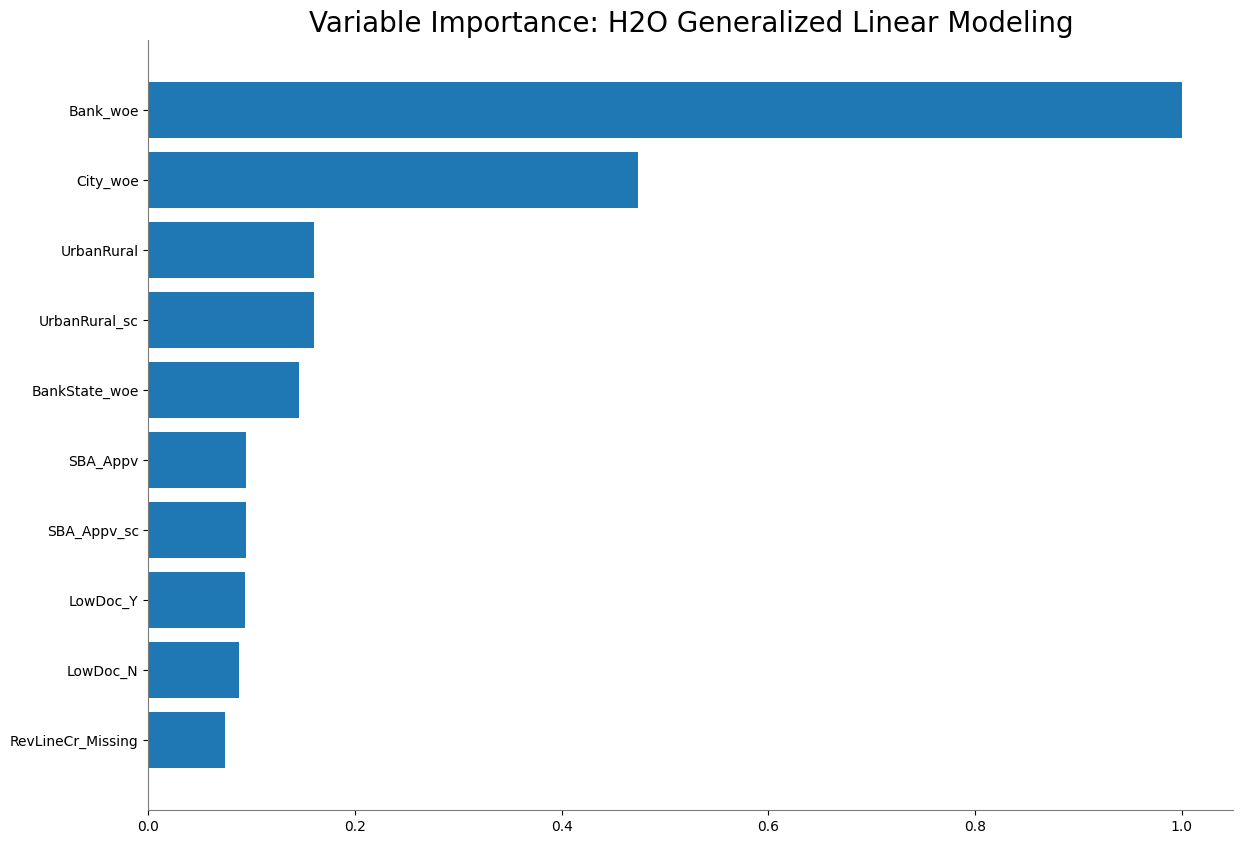

<Figure size 640x480 with 0 Axes>

In [60]:
best_h20_model.varimp_plot()

## Project Summary and Conclusion

Provide your summary and conclusion. The summary should include:
- Summary of your work
- Summary of your findings
- Summary of your model performance
- Summary of your recommendations

I loaded dataset, I cleaned missing data and prepare for processing. After that, I split dataset into train, test and validation and perform encoding. 
I decided to use One-Hot-Encoding for RevLineCr and LowDoc columns, and WOE for other categorical columns. 
Then, I standardize and train model using l1 and l2 types regularization with different solvers, and choose model with the highest F1 score. 
After comparing different regularizations, I see that model with penalty = 'l1' and solver = 'liblinear' has the highest AUCPR: 0.4051, F1 score: 0.44, and threshold: 0.219
Then, I add feature engineer to check if I can get better values. However, the AUCPR is slighly better (0.4052). After that, I tuned model and find that model with penalty = 'l1', solver = 'liblinear', and C = 0.001 is the best sklearn model.
Then I run H20-3 GLM and perform model train using family: binomial. Besides, I used gridsearch to find the hyper-parameter for GLM model. As the result, the AUCPR of GLM is 0.45, which is better than sklearn model. 
From the plot, I can see that Bank and City are two most important variables.My recommendations is that small businesses should focus on choosing banks and locations(cities) when applying for loan. 